In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Set display options for DataFrame
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Function to style DataFrame with borders and hide index
def style_table(df):
    return df.style.set_table_styles([
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('border', '1px solid black')]},
        {'selector': 'th', 'props': [('border', '1px solid black'),
                                      ('background-color', '#40466e'),
                                      ('color', 'white'),
                                      ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid black'),
                                      ('text-align', 'center')]},
        {'selector': '.row_heading', 'props': [('display', 'none')]},
        {'selector': '.blank', 'props': [('display', 'none')]}
    ])

# Load CSV files into DataFrames using the known comma delimiter
house = pd.read_csv("/content/house_sales.csv", delimiter=',')

# Display the styled DataFrames
display(style_table(house.head()))




,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.000000,2,9373,2400,0,3.000000,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.000000,1,20156,3764,1452,3.750000,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.000000,1,26036,2060,900,1.750000,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.000000,1,8618,3200,1640,3.750000,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.000000,1,8620,1720,0,1.750000,4,7,1948,0,0,104000,205000,98168,False


<ipython-input-8-2ad8bb3ca859>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house['SalePrice'].head(10), y=house['PropertyType'].head(10),
<ipython-input-8-2ad8bb3ca859>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house['NbrLivingUnits'].head(10), y=house['SqFtTotLiving'].head(10),
<ipython-input-8-2ad8bb3ca859>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house['Bathrooms'].head(10), y=house['Bedrooms'].head(10),
<ipython-input-8-2ad8bb3ca859>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

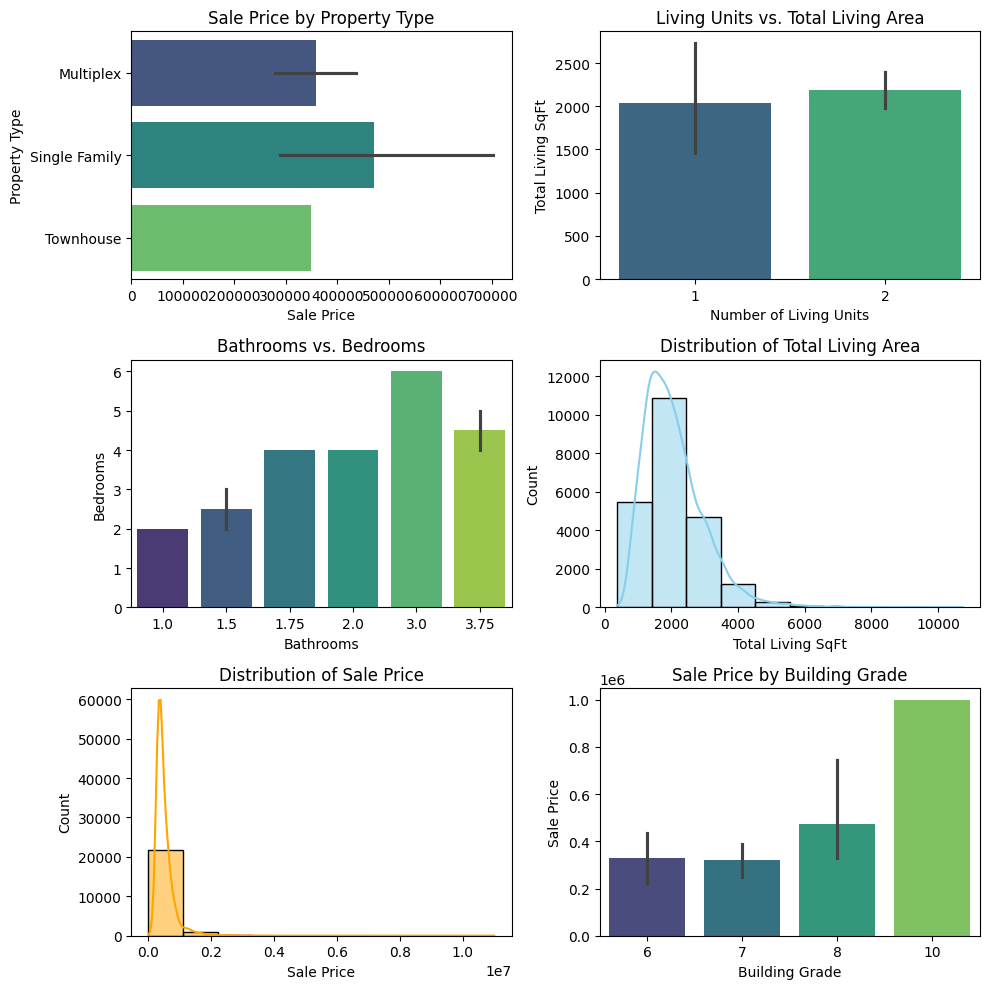

In [8]:

fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # 3 rows, 2 columns

# Subplot (0,0): Bar chart - SalePrice vs PropertyType
sns.barplot(x=house['SalePrice'].head(10), y=house['PropertyType'].head(10),
            palette="viridis", ax=axs[0,0])
axs[0,0].set_xlabel("Sale Price")
axs[0,0].set_ylabel("Property Type")
axs[0,0].set_title("Sale Price by Property Type")

# Subplot (0,1): Bar chart - NbrLivingUnits vs SqFtTotLiving
sns.barplot(x=house['NbrLivingUnits'].head(10), y=house['SqFtTotLiving'].head(10),
            palette="viridis", ax=axs[0,1])
axs[0,1].set_xlabel("Number of Living Units")
axs[0,1].set_ylabel("Total Living SqFt")
axs[0,1].set_title("Living Units vs. Total Living Area")

# Subplot (1,0): Bar chart - Bathrooms vs Bedrooms
sns.barplot(x=house['Bathrooms'].head(10), y=house['Bedrooms'].head(10),
            palette="viridis", ax=axs[1,0])
axs[1,0].set_xlabel("Bathrooms")
axs[1,0].set_ylabel("Bedrooms")
axs[1,0].set_title("Bathrooms vs. Bedrooms")

# Subplot (1,1): Histogram - Distribution of Total Living Area
sns.histplot(house['SqFtTotLiving'], bins=10, kde=True, color="skyblue", ax=axs[1,1])
axs[1,1].set_xlabel("Total Living SqFt")
axs[1,1].set_title("Distribution of Total Living Area")

# Subplot (2,0): Histogram - Distribution of SalePrice
sns.histplot(house['SalePrice'], bins=10, kde=True, color="orange", ax=axs[2,0])
axs[2,0].set_xlabel("Sale Price")
axs[2,0].set_title("Distribution of Sale Price")

# Subplot (2,1): Bar chart - Building Grade vs Sale Price (for top 10 entries)
sns.barplot(x=house['BldgGrade'].head(10), y=house['SalePrice'].head(10),
            palette="viridis", ax=axs[2,1])
axs[2,1].set_xlabel("Building Grade")
axs[2,1].set_ylabel("Sale Price")
axs[2,1].set_title("Sale Price by Building Grade")

plt.tight_layout()
plt.show()

In [12]:

# Load your dataset (adjust the file name/path as needed)
house = pd.read_csv("/content/house_sales.csv")

# Select features and target variable
# Here we use 'SqFtTotLiving', 'Bedrooms', 'Bathrooms', and 'BldgGrade' as predictors for SalePrice.
features = ['SqFtTotLiving', 'Bedrooms', 'Bathrooms', 'BldgGrade']
target = 'SalePrice'

X = house[features]
y = house[target]

# Optionally, check for and handle missing values before proceeding:
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Display the coefficients for each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lr_model.coef_})
print(coefficients)

Mean Squared Error: 61692326903.658394
R^2 Score: 0.5355717291028439
         Feature   Coefficient
0  SqFtTotLiving    201.452356
1       Bedrooms -41308.519273
2      Bathrooms -19040.747465
3      BldgGrade  93690.170383
